<a href="https://colab.research.google.com/github/NayoungShin/projectmanager/blob/main/9_21_%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
url = 'https://ko.wikipedia.org/wiki/HTML'
res = requests.get(url)
res

<Response [200]>

In [ ]:
!pip install cssselect

In [ ]:
import lxml.html
root = lxml.html.fromstring(res.text)

In [ ]:
res.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" lang="ko" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>HTML - 위키백과, 우리 모두의 백과사전</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-c

In [ ]:
ts = root.cssselect('title')  #title만 가져오기



In [ ]:
ts[0].text_content()  #ts의 0번만 가져오기

'HTML - 위키백과, 우리 모두의 백과사전'

In [ ]:
ts

[<Element title at 0x7c1ccf001b70>]

In [ ]:
url = 'https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=인공지능&p={}'  # 인공지능에 대한 모든 paga{}
res = requests.get(url.format(1))
root = lxml.html.fromstring(res.text)
for link in root.cssselect('span.cont_info a.f_nb'):  # span.cont_info에서 뛰어쓰고 그 안에 있는 a.f_nb에서 가져오기
    text = link.text_content().strip()
    if text == '다음뉴스':  #다음뉴스라고 되어있는 text의
        print(link.attrib['href'])   # lin을 보여줘

http://v.daum.net/v/20230919132700610
http://v.daum.net/v/20230920180621489
http://v.daum.net/v/20230920190011686
http://v.daum.net/v/20230920225911543
http://v.daum.net/v/20230919120618559
http://v.daum.net/v/20230921060909465
http://v.daum.net/v/20230918090503295
http://v.daum.net/v/20230921100311905


In [ ]:
url = 'https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=인공지능&p={}'

href = []
for page in range(1, 3):  #1,2 page만 긁어오기
    res = requests.get(url.format(page))
    root = lxml.html.fromstring(res.text)
    for link in root.cssselect('span.cont_info a.f_nb'):
        text = link.text_content().strip()
        if text == '다음뉴스':
            href.append(link.attrib['href'])


In [ ]:
href

['http://v.daum.net/v/20230919132700610',
 'http://v.daum.net/v/20230920180621489',
 'http://v.daum.net/v/20230920190011686',
 'http://v.daum.net/v/20230921114012945',
 'http://v.daum.net/v/20230920225911543',
 'http://v.daum.net/v/20230919120618559',
 'http://v.daum.net/v/20230921060909465',
 'http://v.daum.net/v/20230918090503295',
 'http://v.daum.net/v/20230921100311905',
 'http://v.daum.net/v/20230921090110814',
 'http://v.daum.net/v/20230916071016824',
 'http://v.daum.net/v/20230920174410592',
 'http://v.daum.net/v/20230921111116544',
 'http://v.daum.net/v/20230920170205211',
 'http://v.daum.net/v/20230920103232962',
 'http://v.daum.net/v/20230920090020899',
 'http://v.daum.net/v/20230920110711629',
 'http://v.daum.net/v/20230920104245438',
 'http://v.daum.net/v/20230920103831217']

In [ ]:

res = requests.get('http://v.daum.net/v/20230919132700610')
root = lxml.html.fromstring(res.text)
article = root.cssselect('div.article_view')  #div.article을 선택했을떄 기사 전문이 포함되는 카테고리라서..
article[0].text_content()

' \n         \n          \n           \n           \n            경기도가 챗지피티(ChatGPT) 같은 생성형 인공지능(AI)을 도정에 속속 도입하는 가운데 한계점 등을 두려워 말고 활용하기 시작해 위기를 기회로 만들어야 한다는 의견이 나왔다. 사진은 기업토론 모습. / 사진제공=경기도\n           \n          \n          \n           경기도가 챗지피티(ChatGPT) 같은 생성형 인공지능(AI)을 도정에 속속 도입하는 가운데 한계점 등을 두려워 말고 활용하기 시작해 위기를 기회로 만들어야 한다는 의견이 나왔다.\n          \n          경기도와 경기콘텐츠진흥원은 지난 14일부터 15일까지 수원컨벤션센터에서 \'인공지능이 확장한 문화기술의 세계\'를 주제로 \'2023년 문화기술 콘퍼런스\'를 열었다. 이번 행사는 챗지피티(ChatGPT) 같은 생성형 인공지능이 콘텐츠 산업계에 불러온 혁신을 조명하고 문화기술의 미래를 전망하기 위해 마련됐다.\n          이번 행사에는 \'인공지능의 미래\', \'인간은 필요없다\' 등을 저술한 제리 카플란(Jerry Kaplan) 교수와 유럽 인공지능 윤리학의 거두이자 \'특이점의 신화\'의 저자 장가브리엘 가나시아(Jean-Gabriel Ganascia) 소르본느 대학 교수 등 전 세계에서 저명한 석학들이 참석해 눈길을 끌었다.\n          장가브리엘 가나시아 소르본느 대학 교수는 경기도의 인공지능 도정 활용에 대해 "우선 기계를 사용해서 행정을 하고 있다는 것을 반드시 밝혀야 한다. 개인정보 침해를 조심해야 하고, 오답을 마치 정답처럼 말하는 환각(Hallucination) 문제를 경계해야 한다"며 "기계가 자동으로 무엇을 계속 생성하더라도 모든 것을 맡기지 말고, 대응 인력을 제대로 활용해야 한다"고 조언했다.\n          그러면서 "생성형 인공지능을 두려워하기보다 이용할 수 있어야 한다"며 "

In [ ]:
import tqdm.notebook  #진행속도를 알려주는 라이브러리
articles = []
for h in tqdm.notebook.tqdm(href):
    res = requests.get(h)
    root = lxml.html.fromstring(res.text)
    for article in root.cssselect('div.article_view'):
        articles.append(article.text_content()) #오류 방지를 위해서 article[0]을 하면 기사가 없거나 내용이 없으면 오류남

  0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
articles

[' \n         \n          \n           \n           \n            경기도가 챗지피티(ChatGPT) 같은 생성형 인공지능(AI)을 도정에 속속 도입하는 가운데 한계점 등을 두려워 말고 활용하기 시작해 위기를 기회로 만들어야 한다는 의견이 나왔다. 사진은 기업토론 모습. / 사진제공=경기도\n           \n          \n          \n           경기도가 챗지피티(ChatGPT) 같은 생성형 인공지능(AI)을 도정에 속속 도입하는 가운데 한계점 등을 두려워 말고 활용하기 시작해 위기를 기회로 만들어야 한다는 의견이 나왔다.\n          \n          경기도와 경기콘텐츠진흥원은 지난 14일부터 15일까지 수원컨벤션센터에서 \'인공지능이 확장한 문화기술의 세계\'를 주제로 \'2023년 문화기술 콘퍼런스\'를 열었다. 이번 행사는 챗지피티(ChatGPT) 같은 생성형 인공지능이 콘텐츠 산업계에 불러온 혁신을 조명하고 문화기술의 미래를 전망하기 위해 마련됐다.\n          이번 행사에는 \'인공지능의 미래\', \'인간은 필요없다\' 등을 저술한 제리 카플란(Jerry Kaplan) 교수와 유럽 인공지능 윤리학의 거두이자 \'특이점의 신화\'의 저자 장가브리엘 가나시아(Jean-Gabriel Ganascia) 소르본느 대학 교수 등 전 세계에서 저명한 석학들이 참석해 눈길을 끌었다.\n          장가브리엘 가나시아 소르본느 대학 교수는 경기도의 인공지능 도정 활용에 대해 "우선 기계를 사용해서 행정을 하고 있다는 것을 반드시 밝혀야 한다. 개인정보 침해를 조심해야 하고, 오답을 마치 정답처럼 말하는 환각(Hallucination) 문제를 경계해야 한다"며 "기계가 자동으로 무엇을 계속 생성하더라도 모든 것을 맡기지 말고, 대응 인력을 제대로 활용해야 한다"고 조언했다.\n          그러면서 "생성형 인공지능을 두려워하기보다 이용할 수 있어야 한다"며 

In [ ]:
import pandas as pd
news = pd.DataFrame({'주소': href, '본문': articles})
news.to_excel('기사.xlsx')

In [ ]:
import tqdm.notebook     #제목까지 긁어오기...
titles = []
articles = []
for h in tqdm.notebook.tqdm(href):
    res = requests.get(h)
    root = lxml.html.fromstring(res.text)
    ta = zip(root.cssselect('h3.tit_view'),
             root.cssselect('div.article_view'))
    for title, article in ta:
        titles.append(title.text_content())
        articles.append(article.text_content())

  0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
news = pd.DataFrame({'주소': href, '제목': titles, '본문': articles})
news.to_excel('기사.xlsx')

In [ ]:
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 46.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813255 sha256=3721684eec4ed1313b6a7ac7c7ec559eaaf841c2aa609f52dabd64215c72a7d0
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model


In [ ]:
from kiwipiepy import Kiwi
kiwi = Kiwi()
kiwi.add_user_word('인공지능', 'NNG')

True

In [ ]:
def extract_nouns(text):
    for token in kiwi.tokenize(text):
        if token.tag in {'NNG', 'NNP'}:
            yield token.form

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=100, tokenizer=extract_nouns)
dtm = cv.fit_transform(news['본문'])
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(),
    '빈도': dtm.sum(axis=0).flat
})

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
word_count.sort_values('빈도', ascending=False).head(20)

,단어,빈도
70,인공지능,125
15,기술,102
92,표준,70
87,특허,52
98,활용,34
46,산업,33
64,유망,32
88,특허청,32
77,정보,27
67,이야기,27


###감성 분석

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
df=pd.read_excel('yelp.xlsx')
df.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000, stop_words='english')
dtm = cv.fit_transform(df.review)

In [ ]:
x = dtm                #x값에 dtm을 넣으면 Y값이 긍정인지 부정인지 나오게 하는것
y = df.sentiment

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2, # 20%의 데이터를 테스트용으로 유보
    random_state=42) # 유사난수의 씨앗값 seed을 42로 설정

In [ ]:
y_train

29     0
535    1
695    0
557    0
836    1
      ..
106    1
270    1
860    1
435    0
102    1
Name: sentiment, Length: 800, dtype: int64

#로지스틱 회귀분석
flatten은 이미지에서만 하고
dense(1, sigmoid)와 같은 원래

정칙화 방식을 사용함.

라쏘(네모형태로 됨, 파라미터가 0이 되는 경우가 있음) 극잔적으로 나오는 경우가 있음, 릿지(월형으로 줌)를 합친게 엘라스틱 넷이다.

라쏘 릿지가 각각의 장단이 있음... 원도 아니고 사각형도 아는 형태..


제약조건을 얼마나 강하게 줘야 하는지를 정해야한다.

Cs 정칙화를 얼마나 강하게 할것이냐

L1_ratios[L1 퍼센테이지,L2 퍼센테이지,L3 퍼센테이지]

경직조 3가지, L1 ratio 3가지 해서 총 9가지 하는것

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(
    penalty='elasticnet', solver='saga', random_state=42,
    Cs=[0.1, 1, 10], l1_ratios=[0, 0.5, 1], max_iter=4000)
model.fit(x_train, y_train)

LogisticRegressionCV(Cs=[0.1, 1, 10], l1_ratios=[0, 0.5, 1], max_iter=4000,
                     penalty='elasticnet', random_state=42, solver='saga')

In [ ]:
model.C_ # 정칙화의 강도 결정, 1번이 낫다???

array([1.])

In [ ]:
model.l1_ratio_  # L1 ratio가 L1이 0일대 제일 좋았다. 즉 L1이 0%일때 제일 높았다(동그라미 일때)

array([0])

In [ ]:
model.score(x_train,y_train)

0.94125

In [ ]:
model.score(x_test,y_test)

0.76

In [ ]:
word_coef = pd.DataFrame({
'단어': cv.get_feature_names_out(),
'가중치': model.coef_.flat
})

In [ ]:
word_coef.sort_values('가중치').tail(10)

,단어,가중치
208,excellent,1.340621
221,fantastic,1.439516
250,friendly,1.524526
364,love,1.525609
265,good,1.532660
409,nice,1.555230
32,awesome,1.714438
12,amazing,1.779166
153,delicious,2.201475
268,great,2.867876


In [ ]:
word_coef.sort_values('가중치').head(10)

,단어,가중치
37,bad,-1.448292
179,don,-1.397359
65,bland,-1.274375
939,wasn,-1.225014
392,minutes,-1.177965
977,worst,-1.146635
607,rude,-1.040134
889,unfortunately,-1.039067
703,slow,-1.036536
546,probably,-1.015125


###감정분석, 토픽모델링

In [1]:
import pandas as pd
df=pd.read_excel('patents.xlsx')
df.head()

,status,ko_title,en_title,abstract
0,등록,개운죽 잎 및 줄기 추출물을 함유하는 컨디셔닝 샴푸 조성물 및 이를 이용한 컨디셔닝...,Conditioning shampoo composition containing le...,본 발명은 개운죽 잎 및 줄기 추출물을 함유하여 모발의 윤기와 부드러움의 지속력을 ...
1,공개,탈모 케어 헤어 샴푸 조성물,A SHAMPOO COMPOSITION FOR CARING HAIR LOSS,"본 발명은 탈모 케어 헤어 샴푸 조성물에 관한 것으로, 보다 상세하게는 소리쟁이 추..."
2,등록,천연재료 성분을 함유한 샴푸,shampoo including natural material,"본 발명의 목적은 부작용이 작으면서도 모발이 청결하고, 영양상태를 양호하게 유지할 ..."
3,등록,물 없이 이용 가능한 드라이 샴푸,Dry Shampoo usable without water,본 발명은 물을 실질적으로 사용하지 아니하고도 이용 가능한 모발과 두피를 깨끗하게 ...
4,등록,구증구포 인삼 추출물과 천연 한방 추출물을 함유하는 육모 및 양모 촉진용 화장료 조...,Shampoo and essence using cosmetic composition...,본 발명은 알콜 및 유화제에서 선택된 어느 하나 이상; 양이온성 계면활성제; 및 분...


In [2]:
df.abstract.iloc[0]

'본 발명은 개운죽 잎 및 줄기 추출물을 함유하여 모발의 윤기와 부드러움의 지속력을 향상 시킬 수 있도록 도와 주는 개운죽 잎 및 줄기 추출물을 함유하는 컨디셔닝 샴푸 조성물 및 이를 이용한 컨디셔닝 샴푸 제조방법에 관한 것으로, 본 발명은 정제수, 다이소듐라우레스설포석시네이트, 코카마이드미파, 소듐코코일이세니오네이트, 라우릴글루코사이드, 라우릴베타인, 개운죽 잎 및 줄기 추출물, 라우릴하이드록시설테인을 포함한다.'

In [3]:
df.shape

(439, 4)

In [4]:
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 41.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813255 sha256=d813783420c324bccbb572dfb3bd8c15e57af6f4b51afc1dc11db9a72a3a5a3d
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model


In [5]:
import kiwipiepy
kiwi = kiwipiepy.Kiwi()
def extract_nouns(text):
    for token in kiwi.tokenize(text):
        if token.tag in {'NNG', 'NNP'}:
            yield token.form

In [6]:
list(extract_nouns('샴푸로 머리를 감으니 시원하다'))

['샴푸', '머리']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer=extract_nouns, min_df=10) # 최소 10건의 특허에 나온 단어만
dtm = cv.fit_transform(df.abstract)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [8]:
word_count = pd.DataFrame({
'word': cv.get_feature_names_out(),
'count': dtm.sum(axis=0).flat   # flat은 1열로 나열
})
word_count.sort_values('count', ascending=False).head(20)

,word,count
146,샴푸,973
84,물,744
93,발명,671
262,조성,617
266,중량,546
138,상기,484
81,모발,476
285,추출물,473
314,포함,447
115,부,424


In [9]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=1234)
doc_emb = svd.fit_transform(dtm)

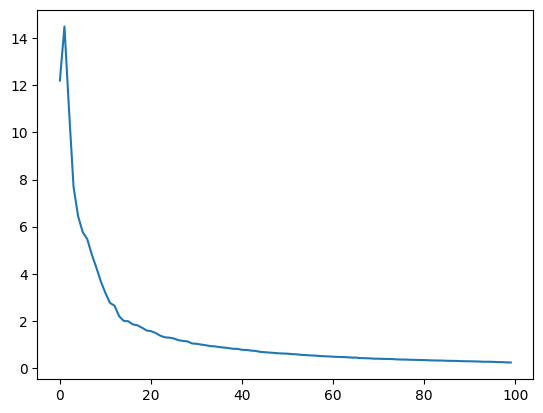

In [10]:
import matplotlib.pyplot as plt
plt.plot(svd.explained_variance_)

In [11]:
svd = TruncatedSVD(n_components=15, random_state=1234)
doc_emb = svd.fit_transform(dtm)

In [12]:
doc_emb[0] # 문서 임베딩 = 디지털 지문 (문서를 수치화해서 그것과 비슷한 것들은 list화할때사용)

array([ 3.55671309, -1.07082997, -1.28625528,  0.91866455, -0.48966027,
       -0.60603371, -0.53578584, -1.05309671, -1.47774955, -0.21321819,
        0.37129185, -1.57235932,  0.71757894, -0.45739868, -0.1774905 ])

In [13]:
df.abstract.iloc[0]

'본 발명은 개운죽 잎 및 줄기 추출물을 함유하여 모발의 윤기와 부드러움의 지속력을 향상 시킬 수 있도록 도와 주는 개운죽 잎 및 줄기 추출물을 함유하는 컨디셔닝 샴푸 조성물 및 이를 이용한 컨디셔닝 샴푸 제조방법에 관한 것으로, 본 발명은 정제수, 다이소듐라우레스설포석시네이트, 코카마이드미파, 소듐코코일이세니오네이트, 라우릴글루코사이드, 라우릴베타인, 개운죽 잎 및 줄기 추출물, 라우릴하이드록시설테인을 포함한다.'

In [14]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
doc_id = 0
sims = cosine_distances(doc_emb[[doc_id]], doc_emb).flatten() #유사도를 계산에는 cosine_distances를 많이 사용함(cosine_similarity도 사용함)
sim_idx = np.argsort(sims)[:10]  # 가장 비슷한거 10개 ,상위 10개만 뽑는것
df.iloc[sim_idx]

,status,ko_title,en_title,abstract
0,등록,개운죽 잎 및 줄기 추출물을 함유하는 컨디셔닝 샴푸 조성물 및 이를 이용한 컨디셔닝...,Conditioning shampoo composition containing le...,본 발명은 개운죽 잎 및 줄기 추출물을 함유하여 모발의 윤기와 부드러움의 지속력을 ...
135,등록,컨디셔닝 샴푸 조성물,CONDITIONING SAMPOO COMPOSITION,"본 발명은 모발을 청결하고 건강하게 관리할 수 있음은 물론, 모발 주변의 피부에 발..."
198,등록,탈모 방지 및 모발 개선 기능을 갖는 샴푸 조성물,Shampoo composition for preventing hair loss a...,"본 발명은, 약용식물워터를 포함하는 샴푸 조성물에 관한 것으로, 상기 약용식물워터는..."
300,등록,홍삼 추출물 함유 모발용 조성물 및 그 제조방법,Hair Composition Containing Red Ginseng Extrac...,"본 발명은 유효성분으로, 홍삼 추출물; 및 상백피 추출물 및 황금 추출물로 구성된 ..."
61,등록,해조류를 포함하는 천연샴푸 조성물,Natural Shampoo Composition Comprising Seaweed,"본 발명은 정제수, 토판염(土版鹽), 소듐라우레스설페이트(Sodium Laureth..."
260,등록,암에 대한 방사선 치료 증진용 조성물,A composition for enhancing the radiotherapy o...,본 발명은 샴푸진저(Zingiber zerumbet)의 조추출물 또는 그 조추출물의...
381,등록,"상심자, 상엽 또는 상백피를 포함하는 염모제용 조성물 및 이의 제조방법","Composition for hairdye comprising mulberry, m...","본 발명은 상심자, 상엽 또는 상백피를 포함하는 염모제용 조성물에 관한 것으로, 보..."
84,등록,탈모예방 및 발모촉진 기능을 갖는 생약숙성탕액을 이용한 천연샴푸 및 그 제조방법,Natural Shampoo by using of Ripen and Decocted...,본 발명의 목적은 연근의 열수추출물을 함유하는 샴푸와 린스용 조성물 및 그 조성물을...
226,등록,작두콩 추출물을 함유한 샴푸와 그 제조 방법,A SHAMPOO CONTAINING EXTRACTS OF SWORD BEAN AN...,"본 발명은 작두콩 추출물을 함유한 샴푸와 그 제조 방법에 관한 것으로, 보다 상세하..."
161,공개,천연 산화질소가 함유된 탈모방지 및 발모촉진용 샴푸,Shampoo Composition for Promoting Restoring Ha...,본 발명은 홍삼추출물을 포함한 애완동물용 샴푸의 조성물을 이용하여 애완동물의 피부와...


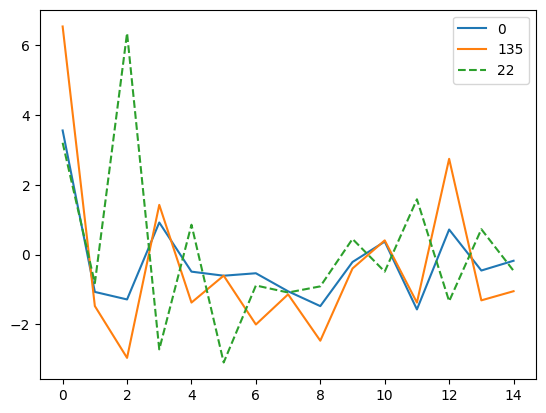

In [15]:
plt.plot(doc_emb[0], label='0')
plt.plot(doc_emb[135], label='135')  # 패턴이 제일 비슷
plt.plot(doc_emb[22], '--', label='22')  # 패턴이 제일 다른
plt.legend()

##추천시스템:
-내용 기반(내용이 비슷한 상품을 추천-->방금배운 기법)
-협업필터링(나랑 비슷한 다흔 사람들이 산 상품 추천)

ex)
흰 티를 하나 샀다
-내용기반: 흰티 주구장창 추천
-협업필터링: 흰 티를 산 다른 고객들이 산 옷(예: 청바지)


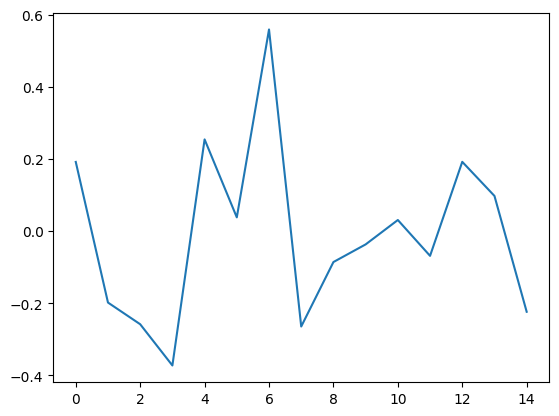

In [16]:
word_emb = svd.components_.T
words = cv.get_feature_names_out().tolist()
i = words.index('모발')
plt.plot(word_emb[i])

In [17]:
from sklearn.metrics.pairwise import cosine_distances
dist = cosine_distances(word_emb)

import numpy as np
s = np.argsort(dist) # i번째 단어와 유사도 순으로 정렬
related = s[i, :10] # 가장 유사도가 높은 10개
for j in related:
    print(words[j])

모발
손상
염색
염모제
트리트먼트
윤기
도포
건조
보호
클렌징


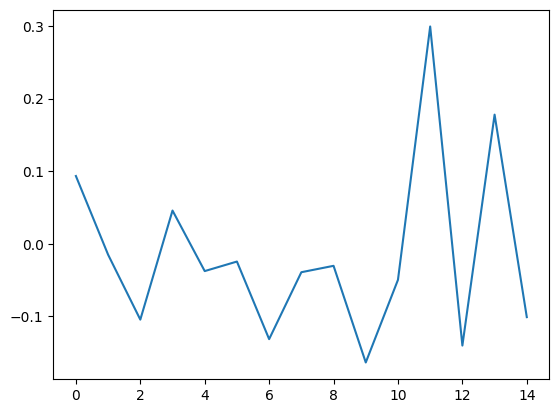

In [20]:
word_emb = svd.components_.T
words = cv.get_feature_names_out().tolist()
i = words.index('탈모')
plt.plot(word_emb[i])

In [21]:
from sklearn.metrics.pairwise import cosine_distances
dist = cosine_distances(word_emb)

import numpy as np
s = np.argsort(dist) # i번째 단어와 유사도 순으로 정렬
related = s[i, :10] # 가장 유사도가 높은 10개
for j in related:
    print(words[j])

탈모
촉진
방지
모
발
발모
예방
유발
비듬
성장


###BERT( GPT형제)

In [1]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 672.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.0 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=b815706c717183003a1b04b00e88d03e93d41dac24386490b184656d40221a72
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [2]:
from sentence_transformers import SentenceTransformer

In [ ]:
sbert = SentenceTransformer('jhgan/ko-sroberta-multitask')  #hugging.face에서 다운받은 프로그램

In [4]:
import pandas as pd
df = pd.read_excel('patents.xlsx')
df.head()

doc_emb = sbert.encode(df['abstract'])

In [5]:
from sklearn.metrics.pairwise import cosine_distances
import numpy as np
doc_idx = 0   # lndex 0번과 비슷한 상품찾기. 여기게 3번을 넣으면 index3번과 비슷한 상품군을 찾는것
dists = cosine_distances(doc_emb[[doc_idx]], doc_emb).flatten()
df.iloc[np.argsort(dists)[:10]]

,status,ko_title,en_title,abstract
0,등록,개운죽 잎 및 줄기 추출물을 함유하는 컨디셔닝 샴푸 조성물 및 이를 이용한 컨디셔닝...,Conditioning shampoo composition containing le...,본 발명은 개운죽 잎 및 줄기 추출물을 함유하여 모발의 윤기와 부드러움의 지속력을 ...
179,등록,생약추출액이 함유된 샴푸조성물,Shampoo composition,본 발명은 두피와 모발의 세정효과가 우수할 뿐만 아니라 두피와 모발의 건강을 유지시...
133,등록,천연 추출물이 함유된 기능성 샴푸 조성물 제조방법,Hair shampoo composition including natural ext...,본 발명은 집중 한방추출물을 복합적으로 적용하여 두피와 모발의 건강을 유지함은 물론...
182,등록,두피 및 모발 상태 개선용 샴푸 조성물,Shampoo composition for improving state of sca...,"본 발명은 두피 및 모발 상태 개선용 샴푸 조성물에 관한 것으로, 더욱 상세하게는 ..."
113,공개,친환경 원료를 사용한 두피 건강용 샴푸,Scalp health shampoo using eco-friendly ingred...,"본 발명은 편백잎, 솔잎, 잣나무잎, 녹차잎 및 병풀을 전해환원수와 혼합하여 발효시..."
196,등록,식물 추출물 및 천연 계면활성제를 함유하는 천연 샴푸 조성물,Natural shampoo composition comprising plant e...,"본 발명은 편백잎, 솔잎, 잣나무잎, 녹차잎 및 병풀을 전해환원수와 혼합하여 발효시..."
198,등록,탈모 방지 및 모발 개선 기능을 갖는 샴푸 조성물,Shampoo composition for preventing hair loss a...,"본 발명은, 약용식물워터를 포함하는 샴푸 조성물에 관한 것으로, 상기 약용식물워터는..."
111,등록,탈모방지 및 발모 촉진용 샴푸,A shampoo for promoting a growith of a hair an...,본 발명은 자생 식물 추출물과 천연 한약재 추출물을 주요 유효 성분으로 하여 비듬을...
107,등록,"황련추출물, 박하추출물 및 사해미네랄을 함유하는 비듬방지용 샴푸 조성물",The Dandruff Preventing Hair Cleaner Compositi...,본 발명은 자생 식물 추출물과 천연 한약재 추출물을 주요 유효 성분으로 하여 비듬을...
206,등록,샴푸 조성물,SHAMPOO COMPOSITION,"본 발명은 샴푸 조성물에 관한 것으로, 정제수, 글루카메이트, 폴리쿼터, 판테놀, ..."


###문서와 단어의 상관관계도 찾을수 있다,

In [6]:
doc_idx = 0
words = ['샴푸', '물', '발명', '조성', '중량', '상기', '모발', '추출물', '포함', '부', '효과', '두피', '제조', '단계', '사용', '성분', '방지', '용기', '탈모', '방법']
word_emb = sbert.encode(words)
dists = cosine_distances(doc_emb[[doc_idx]], word_emb).flatten()  #다큐먼트 즉 문서와, word,단어의 유사관계
for i in np.argsort(dists)[:5]:
    print(words[i])

추출물
두피
모발
효과
방법


###정보검색

In [7]:
import pandas as pd
df = pd.read_csv('neurips.zip') # CSV 압축되어 있으면 자동으로 풀어서 열어줌.
df.head()

,year,title,abstract
0,2007,Competition Adds Complexity,It is known that determinining whether a DEC-P...
1,2007,Efficient Principled Learning of Thin Junction...,We present the first truly polynomial algorith...
2,2007,Regularized Boost for Semi-Supervised Learning,Semi-supervised inductive learning concerns ho...
3,2007,Simplified Rules and Theoretical Analysis for ...,We show that under suitable assumptions (prima...
4,2007,Predicting human gaze using low-level saliency...,"Under natural viewing conditions, human observ..."


In [9]:
query = {'natural', 'language'}

import re
def tokenize(text):
    text = text.lower() # 소문자로 변환
    return re.findall(r'\w{2,}', text) # 2글자 이상 단어 추출

In [10]:
tokenize('It is known that determinining whether a DEC-P...') #토크나이즈가 잘 실행되는지 보는것

['it', 'is', 'known', 'that', 'determinining', 'whether', 'dec']

###순차검색(시간이 오래걸림, 하나하나 다 찾아야 하니깐), 인덱싱(미리 분류 해놓는것) 검색

In [12]:
%%time
results = []
for row in df.itertuples():
    words = set(tokenize(row.abstract))
    if query < words: # 검색어가 부분집합이면
        results.append(row.Index)
        #시간이 얼마정도 걸렸다고 나옴

CPU times: user 354 ms, sys: 0 ns, total: 354 ms
Wall time: 379 ms


In [13]:
df.iloc[results]  # natural, language가 들어간 논문

,year,title,abstract
49,2007,Discriminative Keyword Selection Using Support...,Many tasks in speech processing involve classi...
269,2008,Modeling the effects of memory on human online...,Language comprehension in humans is significan...
542,2009,Rethinking LDA: Why Priors Matter,Implementations of topic models typically use ...
557,2009,Conditional Neural Fields,Conditional random fields (CRF) are quite succ...
846,2010,Probabilistic Deterministic Infinite Automata,We propose a novel Bayesian nonparametric appr...
881,2011,Inverting Grice's Maxims to Learn Rules from N...,We consider the problem of learning rules from...
1068,2011,Kernel Embeddings of Latent Tree Graphical Models,Latent tree graphical models are natural tools...
1079,2011,Higher-Order Correlation Clustering for Image ...,For many of the state-of-the-art computer visi...
1219,2012,Learned Prioritization for Trading Off Accurac...,Users want natural language processing (NLP) s...
1278,2012,Tensor Decomposition for Fast Parsing with Lat...,We describe an approach to speed-up inference ...


In [14]:
len(results)
# 구글: 74억개 찾는데 0.43초 걸림
# 순차검색: 46개 찾는데 0,338초 걸림

46

In [15]:
d = {'a': 1, 'b': 2}
d['a']

1

In [20]:
a = list(range(1000000))

In [21]:
%%time
a.index(999999)

CPU times: user 13.6 ms, sys: 0 ns, total: 13.6 ms
Wall time: 17.5 ms


999999

In [22]:
b = dict(zip(a, a))

In [23]:
%%time
b[999999]  # 100만분의 8초

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


999999

###왜 dictionary검색이 빠른가???? 인덱싱을 해놓기 때문에.

In [17]:
from collections import defaultdict
index = defaultdict(set)

for row in df.itertuples():
    words = tokenize(row.abstract)
    for word in words:
        index[word].add(row.Index)

index['language']

{15,
 27,
 49,
 51,
 90,
 161,
 197,
 269,
 278,
 347,
 423,
 450,
 505,
 542,
 557,
 626,
 634,
 747,
 781,
 846,
 881,
 1068,
 1079,
 1219,
 1243,
 1278,
 1420,
 1503,
 1570,
 1660,
 1805,
 1806,
 1807,
 1906,
 1911,
 1917,
 1961,
 1980,
 2047,
 2061,
 2138,
 2167,
 2186,
 2187,
 2216,
 2284,
 2312,
 2393,
 2412,
 2421,
 2481,
 2482,
 2501,
 2516,
 2536,
 2544,
 2581,
 2585,
 2682,
 2696,
 2700,
 2735,
 2770,
 2822,
 2835,
 2864,
 2877,
 2895,
 2897,
 2900,
 2920,
 2931,
 2934,
 3021,
 3034,
 3047,
 3082,
 3104,
 3105,
 3148,
 3207,
 3264,
 3266,
 3282,
 3296,
 3303,
 3333,
 3438,
 3445,
 3543,
 3554,
 3581,
 3640,
 3642,
 3702,
 3727,
 3765,
 3794,
 3808,
 3820,
 3844,
 3872,
 3878,
 3883,
 3885}

In [18]:
%%time
result=list(index['natural']&index['language'])
#아까는 0.378걸렸는데, dic로 하니깐 wall time이 0.000033초 걸림. 만배 빨라짐.
# 인덱싱 검색엔진을 elasticsearch라는 회사가 있음.

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 35 µs
